In [1]:
import pandas as pd
import numpy as np
from scipy.stats import norm
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import warnings; warnings.simplefilter('ignore')


In [2]:
# 데이터를 우선 가져와야합니다.
train = pd.read_csv("C:\\kaggle\\house\\train.csv")
test= pd.read_csv("C:\\kaggle\\house\\test.csv")
submission=pd.read_csv('C:\\kaggle\\house\\sample_submission.csv')

In [3]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
train.shape

(1460, 81)

In [5]:
test.shape

(1459, 80)

In [6]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

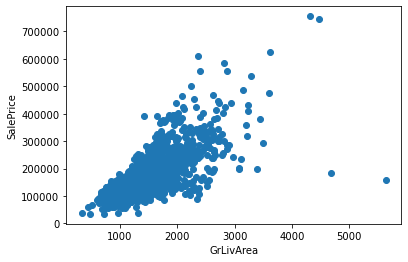

In [7]:
# 이상치 제거 (Outlier remove)
fig, ax = plt.subplots()
ax.scatter(x = train['GrLivArea'], y = train['SalePrice'])
plt.ylabel('SalePrice')
plt.xlabel('GrLivArea')
plt.show()

In [8]:
# 이상치를 제거
train = train[train['GrLivArea']<4000]
train = train[train['GarageArea']<1200]
train = train[train['1stFlrSF']<2700]
train = train[train['2ndFlrSF']<1700]
train = train[train['TotalBsmtSF']<3000]


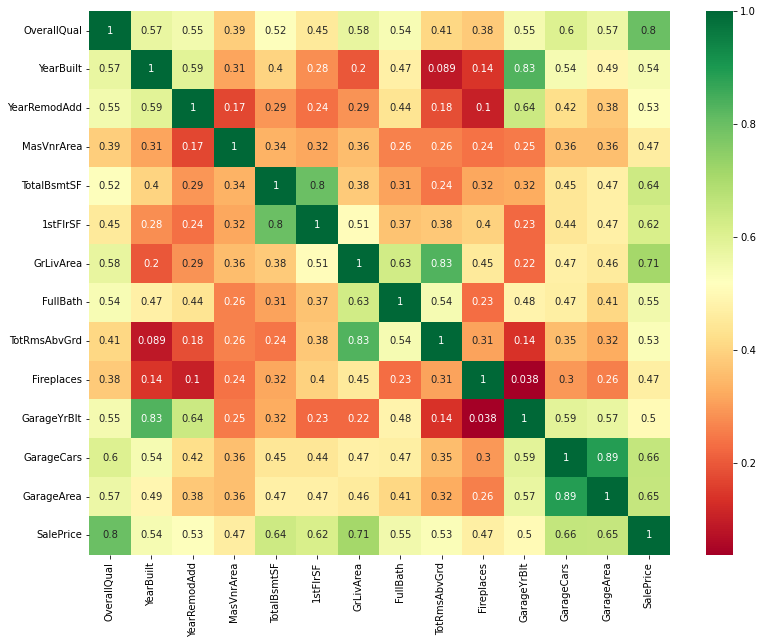

In [9]:
# 상관관계 분석
# 상관계수
corrmat = train.corr()
corr_columns = corrmat.index[abs(corrmat["SalePrice"])>=0.4] # 상관계수 0.4 이상만 포함
corr_columns
 
# 히트맵
plt.figure(figsize=(13,10))
heatmap = sns.heatmap(train[corr_columns].corr(),annot=True,cmap="RdYlGn")

In [12]:
df_train = train.drop(['SalePrice'],axis=1)
df = pd.concat((df_train,test))


<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

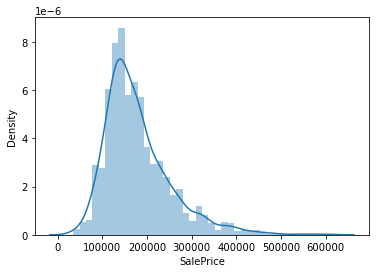

In [13]:
sns.distplot(train['SalePrice'])


<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

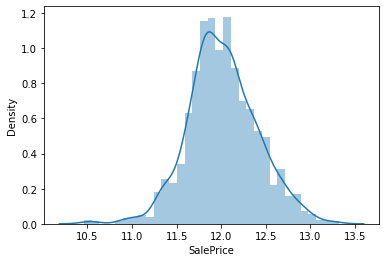

In [14]:
train['SalePrice'] = np.log1p(train["SalePrice"])
sns.distplot(train['SalePrice'])

In [15]:
price = train['SalePrice']


In [16]:
# 결측치(null) 확인 및 처리
null = (df.isna().sum() / len(df) * 100) #백분율로 계산
 
null = null.drop(null[null == 0].index).sort_values(ascending=False)
null

PoolQC          99.724613
MiscFeature     96.419966
Alley           93.184165
Fence           80.378657
FireplaceQu     48.846816
LotFrontage     16.626506
GarageFinish     5.473322
GarageQual       5.473322
GarageCond       5.473322
GarageYrBlt      5.473322
GarageType       5.404475
BsmtExposure     2.822719
BsmtCond         2.822719
BsmtQual         2.788296
BsmtFinType1     2.719449
BsmtFinType2     2.719449
MasVnrType       0.826162
MasVnrArea       0.791738
MSZoning         0.137694
BsmtFullBath     0.068847
BsmtHalfBath     0.068847
Functional       0.068847
Utilities        0.068847
GarageArea       0.034423
GarageCars       0.034423
Electrical       0.034423
KitchenQual      0.034423
TotalBsmtSF      0.034423
BsmtUnfSF        0.034423
BsmtFinSF2       0.034423
BsmtFinSF1       0.034423
Exterior2nd      0.034423
Exterior1st      0.034423
SaleType         0.034423
dtype: float64

In [17]:
# PoolQC : 수영장 품질, nan = 존재X (99%)
df['PoolQC'] = df['PoolQC'].fillna('None')
 
# MiscFeature : 기타기능, nan = 존재X (96%)
df['MiscFeature'] = df['MiscFeature'].fillna('None')
 
# Alley : 골목 접근 유형, nan = 골목 접근 금지
df['Alley'] = df['Alley'].fillna('None')
 
# Fence : 울타리 여부, nan = 울타리 없음
df['Fence'] = df['Fence'].fillna('None')
 
# FireplaceQu : 벽난로 품질, nan = 벽난로 없음
df['FireplaceQu'] = df['FireplaceQu'].fillna('None')
 
# LotFrontage : 부동산과 연결된 거리의 직선 피트, nan = 연결된 거리 없음
df['LotFrontage'] = df['LotFrontage'].fillna(0)
 
# GarageFinish : 차고 마감재 품질, nan = 차고 없음
df['GarageFinish'] = df['GarageFinish'].fillna('None')
 
# GarageYrBlt : 차고 제작연도, nan = 차고 없음
df['GarageYrBlt'] = df['GarageYrBlt'].fillna(0)
 
# GarageQual : 차고 품질, nan = 차고 없음
df['GarageQual'] = df['GarageQual'].fillna('None')
 
# GarageCond : 차고 상태, nan = 차고 없음
df['GarageCond'] = df['GarageCond'].fillna('None')
 
# GarageType : 차고 유형, nan = 차고 없음
df['GarageType'] = df['GarageType'].fillna('None')
 
# 지하실 관련 카테고리형 데이터, nan = 지하실 없음
# BsmtExposure, BsmtCond, BsmtQual, BsmtFinType1, BsmtFinType2
for data in ['BsmtExposure', 'BsmtCond', 'BsmtQual', 'BsmtFinType1', 'BsmtFinType2']:
    df[data] = df[data].fillna('None')
    
# 지하실 관련 수치형 데이터, nan = 지하실 없음
# BsmtFullBath, BsmtHalfBath, BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF
for data in ['BsmtFullBath', 'BsmtHalfBath', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF']:
    df[data] = df[data].fillna(0)
    
# MasVnrType : 석조베니어 형태, nan = 베니어 없음
df['MasVnrType'] = df['MasVnrType'].fillna('None')
 
# MasVnrArea : 석조베니어 공간, nan = 베니어 없음
df['MasVnrArea'] = df['MasVnrArea'].fillna(0)
 
# MSZoning : RL이 제일 흔한 값이므로 결측치 RL로 변경
df['MSZoning'] = df['MSZoning'].fillna('RL')
 
# Utilities : AllPub이 가장 흔한 값이므로 결측치 AllPub으로 변경
df['Utilities'] = df['Utilities'].fillna('AllPub')
 
# Functional : 홈 기능, 가장 일반적인 Typ로 변경
df["Functional"] = df["Functional"].fillna("Typ")
 
# Exterior2nd :집 외부 덮개 (소재가 2개 이상인 경우), nan = 소재 1개만 사용
df['Exterior2nd'] = df['Exterior2nd'].fillna('None')
df['Exterior1st'] = df['Exterior1st'].fillna('VinylSd')
 
# Electrical : 전기시스템, 'SBrkr'이 제일 흔한 값이므로 변경
df['Electrical'] = df['Electrical'].fillna('SBrkr')
 
# KitchenQual : 주방 품질, 'TA'가 가장 흔한 값이므로 변경
df['KitchenQual'] = df['KitchenQual'].fillna('TA')
 
# GarageCars, GarageArea : 차고의 차 개수와 차고넓이, nan = 차고없음
df['GarageCars'] = df['GarageCars'].fillna(0)
df['GarageArea'] = df['GarageArea'].fillna(0)
 
# SaleType : 판매 유형, 가장 흔한 값인 'WD'로 변경
df['SaleType'] = df['SaleType'].fillna('WD')

In [18]:
# PoolQC : 수영장 품질, nan = 존재X (99%)
df['PoolQC'] = df['PoolQC'].fillna('None')
 
# MiscFeature : 기타기능, nan = 존재X (96%)
df['MiscFeature'] = df['MiscFeature'].fillna('None')
 
# Alley : 골목 접근 유형, nan = 골목 접근 금지
df['Alley'] = df['Alley'].fillna('None')
 
# Fence : 울타리 여부, nan = 울타리 없음
df['Fence'] = df['Fence'].fillna('None')
 
# FireplaceQu : 벽난로 품질, nan = 벽난로 없음
df['FireplaceQu'] = df['FireplaceQu'].fillna('None')
 
# LotFrontage : 부동산과 연결된 거리의 직선 피트, nan = 연결된 거리 없음
df['LotFrontage'] = df['LotFrontage'].fillna(0)
 
# GarageFinish : 차고 마감재 품질, nan = 차고 없음
df['GarageFinish'] = df['GarageFinish'].fillna('None')
 
# GarageYrBlt : 차고 제작연도, nan = 차고 없음
df['GarageYrBlt'] = df['GarageYrBlt'].fillna(0)
 
# GarageQual : 차고 품질, nan = 차고 없음
df['GarageQual'] = df['GarageQual'].fillna('None')
 
# GarageCond : 차고 상태, nan = 차고 없음
df['GarageCond'] = df['GarageCond'].fillna('None')
 
# GarageType : 차고 유형, nan = 차고 없음
df['GarageType'] = df['GarageType'].fillna('None')
 
# 지하실 관련 카테고리형 데이터, nan = 지하실 없음
# BsmtExposure, BsmtCond, BsmtQual, BsmtFinType1, BsmtFinType2
for data in ['BsmtExposure', 'BsmtCond', 'BsmtQual', 'BsmtFinType1', 'BsmtFinType2']:
    df[data] = df[data].fillna('None')
    
# 지하실 관련 수치형 데이터, nan = 지하실 없음
# BsmtFullBath, BsmtHalfBath, BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF
for data in ['BsmtFullBath', 'BsmtHalfBath', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF']:
    df[data] = df[data].fillna(0)
    
# MasVnrType : 석조베니어 형태, nan = 베니어 없음
df['MasVnrType'] = df['MasVnrType'].fillna('None')
 
# MasVnrArea : 석조베니어 공간, nan = 베니어 없음
df['MasVnrArea'] = df['MasVnrArea'].fillna(0)
 
# MSZoning : RL이 제일 흔한 값이므로 결측치 RL로 변경
df['MSZoning'] = df['MSZoning'].fillna('RL')
 
# Utilities : AllPub이 가장 흔한 값이므로 결측치 AllPub으로 변경
df['Utilities'] = df['Utilities'].fillna('AllPub')
 
# Functional : 홈 기능, 가장 일반적인 Typ로 변경
df["Functional"] = df["Functional"].fillna("Typ")
 
# Exterior2nd :집 외부 덮개 (소재가 2개 이상인 경우), nan = 소재 1개만 사용
df['Exterior2nd'] = df['Exterior2nd'].fillna('None')
df['Exterior1st'] = df['Exterior1st'].fillna('VinylSd')
 
# Electrical : 전기시스템, 'SBrkr'이 제일 흔한 값이므로 변경
df['Electrical'] = df['Electrical'].fillna('SBrkr')
 
# KitchenQual : 주방 품질, 'TA'가 가장 흔한 값이므로 변경
df['KitchenQual'] = df['KitchenQual'].fillna('TA')
 
# GarageCars, GarageArea : 차고의 차 개수와 차고넓이, nan = 차고없음
df['GarageCars'] = df['GarageCars'].fillna(0)
df['GarageArea'] = df['GarageArea'].fillna(0)
 
# SaleType : 판매 유형, 가장 흔한 값인 'WD'로 변경
df['SaleType'] = df['SaleType'].fillna('WD')

In [19]:
# 판매월과 판매연도가 수치형으로 되어있어 카테고리형(str)로 타입 변경
df['YrSold'] = df['YrSold'].astype(str)
df['MoSold'] = df['MoSold'].astype(str)
 
# 주거유형이 수치형으로 되어있어 카테고리형으로 타입변경
df['MSSubClass'] = df['MSSubClass'].astype(str)
# 수치형데이터와 범주형데이터 분리
obj_df = df.select_dtypes(include='object')
num_df = df.select_dtypes(exclude='object')


범주형 데이터 처리 (라벨인코딩)
1. LabelEncoding
2. One-hot Encoding

In [20]:
# 등급이 나누어지거나, 순서가 없는 경우 모델에 잘못 반영될 수 있기 때문에 등급, 여부 칼럼만 포함
 
label_obj_list = ['Street', 'Alley','ExterQual', 'ExterCond','BsmtCond','HeatingQC', 'CentralAir',
       'KitchenQual', 'FireplaceQu','GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC',
       'Fence', 'MoSold', 'YrSold','SaleCondition']
       
# 카테고리형 칼럼을 라벨인코딩 (수치화, 문자를 0부터 시작하는 정수형 숫자로 바꾸어줌)
from sklearn.preprocessing import LabelEncoder
 
# encoder = LabelEncoder()
 
for obj in label_obj_list:
    encoder = LabelEncoder()
    encoder.fit(list(df[obj].values))
    df[obj] = encoder.transform(list(df[obj].values))

In [21]:
# 수치형 데이터 처리 (왜도)
num_features = df.dtypes[df.dtypes != "object"].index
 
from scipy.stats import skew 
skewness = df[num_features].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
 
high_skewness = skewness[abs(skewness) > 1] # 왜도 값이 1 이상인 칼럼만 채택
skew_feats = high_skewness.index
print(high_skewness)

MiscVal          21.904223
PoolArea         18.669449
LotArea          13.245250
LowQualFinSF     12.059175
3SsnPorch        11.348142
KitchenAbvGr      4.290310
BsmtFinSF2        4.166631
EnclosedPorch     4.017907
ScreenPorch       3.946659
BsmtHalfBath      3.934869
MasVnrArea        2.551011
OpenPorchSF       2.528255
WoodDeckSF        1.856938
1stFlrSF          1.212917
KitchenQual      -1.454760
ExterQual        -1.802948
Fence            -1.988541
ExterCond        -2.499174
SaleCondition    -2.797852
BsmtCond         -2.853376
PavedDrive       -2.969670
GarageQual       -3.064592
CentralAir       -3.448736
GarageCond       -3.585278
GarageYrBlt      -3.895128
Street          -16.158425
PoolQC          -22.944518
dtype: float64


In [22]:
# 파생 변수
df['TotalFlrSF'] = (df['1stFlrSF'] + df['2ndFlrSF'] + df['TotalBsmtSF']) # 부동산의 총 제곱피트
 
df['TotalBath'] = (df['FullBath'] + df['HalfBath'] + df['BsmtFullBath'] + df['BsmtHalfBath']) # 화장실
 
df['RemodorNot'] = np.where(df['YearBuilt'] == df['YearRemodAdd'], 0, 1) # 리모델링 여부
 
df['PoolorNot'] = np.where(df['PoolArea'] > 0, 1, 0) # 수영장 여부
 
df['GarageorNot'] = np.where(df['GarageArea'] > 0, 1, 0) # 차고 여부
 
df['BsmtorNot'] = np.where(df['TotalBsmtSF'] > 0, 1, 0) # 지하실 여부
 
df['FireplaceorNot'] = np.where(df['Fireplaces'] > 0, 1, 0) # 벽난로 여부
 

In [23]:
# One-hot Encoding
df = pd.get_dummies(df)
 
df.shape

(2905, 271)

In [24]:
train_df = df[:train.shape[0]]
test_df = df[train.shape[0]:]
train_df = pd.concat([train_df, price], axis=1, sort=False)

# 학습 과정에서 필요없는 변수 drop
train_df = train_df.drop(['SalePrice', 'Id'], axis=1) # log변환을 한 price가 있기 때문
test_df = test_df.drop(['Id'], axis=1)

In [30]:
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.linear_model import ElasticNet, Lasso, LinearRegression

In [31]:
# RobustScaler
# 중앙값과 IQR(사분면도) 이용하여 아웃라이어의 영향을 최소화하도록 한다.
from sklearn.preprocessing import RobustScaler

rbst_scaler=RobustScaler()
X_rbst=rbst_scaler.fit_transform(train_df)
test_rbst=rbst_scaler.transform(test_df)

In [32]:
# KFold 검증
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold

kfold = KFold(n_splits=4)

random_state = 1
reg = []

reg.append(Lasso(random_state = random_state))
reg.append(ElasticNet(random_state = random_state))
reg.append(RandomForestRegressor(random_state=random_state))
reg.append(GradientBoostingRegressor(random_state=random_state))
reg.append(XGBRegressor(silent=True,random_state=random_state))
reg.append(LGBMRegressor(verbose_eval=False,random_state = random_state))

# print(reg)

reg_results = []

for regre in reg :
    reg_results.append(np.mean(np.sqrt(-cross_val_score(regre, X_rbst, y = price,scoring = 'neg_mean_squared_error',
                                       cv = kfold, n_jobs=-4))))

In [33]:
reg_means = []
reg_std = []
for reg_result in reg_results:
    reg_means.append(reg_result.mean())
    reg_std.append(reg_result.std())
reg_re = pd.DataFrame({"CrossValMeans":reg_means,"CrossValerrors": reg_std})
reg_re

,CrossValMeans,CrossValerrors
0,0.375504,0.0
1,0.366059,0.0
2,0.135299,0.0
3,0.121208,0.0
4,0.134062,0.0
5,0.125406,0.0


In [34]:
# GridSearchCV
# Gradient boosting 파라미터 튜닝
GBC = GradientBoostingRegressor()
gb_param_grid = {'n_estimators' : [100,200,300],
              'learning_rate': [0.1, 0.05, 0.01],
              'max_depth': [4, 8],
              'min_samples_leaf': [100,150],
              'max_features': [0.3, 0.1] 
              }
gsGBC = GridSearchCV(GBC,param_grid = gb_param_grid, cv=kfold, scoring="neg_mean_squared_error", n_jobs= 4, verbose = 1)
gsGBC.fit(X_rbst,price)
GBC_best = gsGBC.best_estimator_

# 최고 점수
gsGBC.best_score_

Fitting 4 folds for each of 72 candidates, totalling 288 fits


-0.016934418188049978

In [36]:
GBC_best

GradientBoostingRegressor(max_depth=4, max_features=0.3, min_samples_leaf=100,
                          n_estimators=300)

In [37]:
#LGBMClassifier 파라미터 튜닝
LGB = LGBMRegressor()
lgb_param_grid = {
    'num_leaves' : [1,5,10],
    'learning_rate': [1,0.1,0.01,0.001],
    'n_estimators': [50, 100, 200, 500, 1000,5000], 
    'max_depth': [15,20,25],
    'num_leaves': [50, 100, 200],
    'min_split_gain': [0.3, 0.4]
}
gsLGB = GridSearchCV(LGB,param_grid = lgb_param_grid, cv=kfold, scoring="neg_mean_squared_error", n_jobs= 4, verbose = 1)
gsLGB.fit(X_rbst,price)
LGB_best = gsLGB.best_estimator_

# 최고 점수
gsLGB.best_score_

Fitting 4 folds for each of 432 candidates, totalling 1728 fits


-0.018823386531360158

In [38]:
LGB_best

LGBMRegressor(max_depth=15, min_split_gain=0.3, n_estimators=50, num_leaves=50)

In [39]:
#RandomForest 파라미터 튜닝
RF = RandomForestRegressor()
rf_param_grid = {
        'n_estimators' : [1,10, 100],
           'max_depth' : [6, 8, 10, 12],
           'min_samples_leaf' : [8, 12, 18],
           'min_samples_split' : [8, 16, 20]
}
gsRF = GridSearchCV(RF,param_grid = rf_param_grid, cv=kfold, scoring="neg_mean_squared_error", n_jobs= 4, verbose = 1)
gsRF.fit(X_rbst,price)
RF_best = gsRF.best_estimator_

# 최고 점수
gsRF.best_score_


Fitting 4 folds for each of 108 candidates, totalling 432 fits


-0.020292426696384883

In [40]:
RF_best

RandomForestRegressor(max_depth=12, min_samples_leaf=8, min_samples_split=16)

In [41]:
# Prediction (예측)
# Voting
from sklearn.ensemble import VotingRegressor

votingC = VotingRegressor(estimators=[('LGB', LGB_best), ('GBC',GBC_best), ('RF', RF_best)], n_jobs=4)
votingC = votingC.fit(X_rbst, price)

In [42]:
# test 데이터에 대해 예측
test_SalePrice = pd.Series(votingC.predict(test_rbst), name="SalePrice")

In [43]:
submission = pd.DataFrame({
    "Id" :test['Id'],
    "SalePrice": np.expm1(test_SalePrice)
})


submission.to_csv('voting.csv', index=False)

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not install packages due to an OSError: [WinError 5] 액세스가 거부되었습니다: 'C:\\anaconda\\Lib\\site-packages\\~cipy\\cluster\\_hierarchy.cp39-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



  Attempting uninstall: scipy
    Found existing installation: scipy 1.7.1
    Uninstalling scipy-1.7.1:
      Successfully uninstalled scipy-1.7.1
